In [59]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
from pandas import ExcelWriter
from pandas import ExcelFile
from pprint import pprint
from scipy.stats import linregress

In [2]:
# File to Load (Remember to Change These)
fileordprod = "./data/brazilian-ecommerce/olist_order_items_dataset.csv"

# Read Purchasing File and store into Pandas data frame
ordprod = pd.read_csv(fileordprod)[['order_id', 'product_id', 'price']]
print(ordprod.shape)
ordprod.head()

(112650, 3)


,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90


In [3]:
# File to Load (Remember to Change These)
fileordcusttime = "./data/brazilian-ecommerce/olist_orders_dataset.csv"

# Read Purchasing File and store into Pandas data frame
ordcusttime= pd.read_csv(fileordcusttime)[['order_id', 'customer_id', 'order_purchase_timestamp']]
print(ordcusttime.shape)
ordcusttime.head()

(99441, 3)


,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39


In [4]:
# File to Load (Remember to Change These)
fileprodcat = "./data/brazilian-ecommerce/olist_products_dataset.csv"

# Read Purchasing File and store into Pandas data frame
prodcat = pd.read_csv(fileprodcat)[['product_id', 'product_category_name']]
prodcat.head()


,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [5]:
# File to Load (Remember to Change These)
fileprodtransl = "./data/brazilian-ecommerce/product_category_name_translation.csv"

# Read Purchasing File and store into Pandas data frame
prodtransl = pd.read_csv(fileprodtransl)
prodtransl.head()


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
mergedf = pd.merge(ordcusttime, ordprod, on = 'order_id',how= 'left')
mergedf = pd.merge(mergedf, prodcat, on = 'product_id', how = 'left')
mergedf = pd.merge(mergedf, prodtransl, on = 'product_category_name', how = 'left')
renamecolumns = {
    'order_purchase_timestamp': 'order_time',
    'product_category_name_english': 'category'
}
mergedf = mergedf.rename(columns = renamecolumns)
print(mergedf.shape)

mergedf ["date_time"]= pd.to_datetime(mergedf['order_time'])

#mergedf = mergedf[['order_purchase_timestamp', 'product_category_name_english', 'price']]

#renamecolumns = {
  #  'order_purchase_timestamp': 'time',
    #'product_category_name_english': 'category'
#}
#mergedf = mergedf.rename(columns = renamecolumns)
#print(mergedf.shape)
#len(mergedf['category'].unique())



(113425, 7)


In [7]:
mergedf['YYYY'] = pd.DatetimeIndex(mergedf['date_time']).year
mergedf['MM'] = pd.DatetimeIndex(mergedf['date_time']).month
mergedf

#converted to MM/YY Format
mergedf['month'] = pd.to_datetime(mergedf['date_time'])
mergedf['day'] = mergedf['month'].dt.strftime('%m/%d/%y')
mergedf['month'] = mergedf['month'].dt.strftime('%m/%y')


mergedf.head()

,order_id,customer_id,order_time,product_id,price,product_category_name,category,date_time,YYYY,MM,month,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,housewares,2017-10-02 10:56:33,2017,10,10/17,10/02/17
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,perfumery,2018-07-24 20:41:37,2018,7,07/18,07/24/18
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,auto,2018-08-08 08:38:49,2018,8,08/18,08/08/18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,pet_shop,2017-11-18 19:28:06,2017,11,11/17,11/18/17
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,stationery,2018-02-13 21:18:39,2018,2,02/18,02/13/18


In [8]:
# URL for GET requests to retrieve data
urlCPI = "https://www.quandl.com/api/v3/datasets/BCB/191.json?api_key=2vRuu5GNchksqBdcAHzc"
urlBOV = "https://www.quandl.com/api/v3/datasets/BCB/7.json?api_key=2vRuu5GNchksqBdcAHzc"
urlEMP = "https://www.quandl.com/api/v3/datasets/BCB/10806.json?api_key=2vRuu5GNchksqBdcAHzc"

responseCPI = requests.get(urlCPI).json()
#print(json.dumps(response, indent=4, sort_keys=True))

responseBOV = requests.get(urlBOV).json()
#print(json.dumps(response, indent=4, sort_keys=True))

In [9]:
CPI_df = pd.DataFrame(responseCPI['dataset']['data'])

CPI_df = CPI_df.rename(index=str, columns={0: "month", 1: "CPI"})

CPI_df['month'] = pd.to_datetime(CPI_df['month'])
CPI_df['month'] = CPI_df['month'].dt.strftime('%m/%y')
#CPI_df.head()

In [10]:
BOV_df = pd.DataFrame(responseBOV['dataset']['data'])

BOV_df = BOV_df.rename(index=str, columns={0: "day", 1: "EMP"})

BOV_df['day'] = pd.to_datetime(BOV_df['day'])
BOV_df['day'] = BOV_df['day'].dt.strftime('%m/%d/%y')
BOV_df.head()

,day,EMP
0,12/14/18,87449.0
1,12/13/18,87837.0
2,12/12/18,86977.0
3,12/11/18,86419.0
4,12/10/18,85914.0


In [11]:
mergedf = pd.merge(mergedf, CPI_df, on = 'month', how = 'left')
mergedf = pd.merge(mergedf, BOV_df, on = 'day', how = 'left')

mergedf

,order_id,customer_id,order_time,product_id,price,product_category_name,category,date_time,YYYY,MM,month,day,CPI,EMP
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,housewares,2017-10-02 10:56:33,2017,10,10/17,10/02/17,0.33,74359.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,perfumery,2018-07-24 20:41:37,2018,7,07/18,07/24/18,0.17,79154.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,auto,2018-08-08 08:38:49,2018,8,08/18,08/08/18,0.07,79151.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,pet_shop,2017-11-18 19:28:06,2017,11,11/17,11/18/17,0.36,NaN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,stationery,2018-02-13 21:18:39,2018,2,02/18,02/13/18,0.17,NaN
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 21:57:05,060cb19345d90064d1015407193c233d,147.90,automotivo,auto,2017-07-09 21:57:05,2017,7,07/17,07/09/17,0.38,NaN
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,2017-04-11 12:22:08,a1804276d9941ac0733cfd409f5206eb,49.90,NaN,NaN,2017-04-11 12:22:08,2017,4,04/17,04/11/17,0.12,64359.0
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:10:30,4520766ec412348b8d4caa5e8a18c464,59.99,automotivo,auto,2017-05-16 13:10:30,2017,5,05/17,05/16/17,0.52,68684.0
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,2017-01-23 18:29:09,ac1789e492dcd698c5c10b97a671243a,19.90,moveis_decoracao,furniture_decor,2017-01-23 18:29:09,2017,1,01/17,01/23/17,0.69,65748.0
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,2017-07-29 11:55:02,9a78fb9862b10749a117f7fc3c31f051,149.99,moveis_escritorio,office_furniture,2017-07-29 11:55:02,2017,7,07/17,07/29/17,0.38,NaN


In [12]:
mergedf['category'].unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery', nan,
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'christmas_supplies',
       'fashion_bags_accessories', 'musical_instruments',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_confort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_sho

In [13]:
# red = fashion/clothing
    # 'perfumery', 'watches_gifts','fashion_underwear_beach','fashion_bags_accessories','fashion_shoes','fashion_male_clothing','fashion_sport','fashio_female_clothing','fashion_childrens_clothes'
# orange = home/furniture
    # 'housewares','furniture_decor','office_furniture','bed_bath_table','home_confort','furniture_bedroom','kitchen_dining_laundry_garden_furniture','home_comfort_2','furniture_mattress_and_upholstery'
# yellow = construction/tools
    # 'garden_tools','construction_tools_construction','construction_tools_lights','construction_tools_garden','construction_tools_safety','home_construction','construction_tools_tools'
# purple = electronics
    # 'computers_accessories','telephony','electionics','cds_dvds_musicals','consoles_games','audio','tablets_printing_image','computers','dvds_blu_ray','music'
# green = food and drink
    # 'food','drinks','food_drink','la_cuisine'
# cyan = books
    # 'books_general_interest','books_imported','books_technical'
# gray = appliances
    # 'air_conditioning','small_appliances','home_appliances','home_appliances_2','small_appliances_home_oven_and_coffee'

In [98]:

new_categories = {'fashion_clothing': ['perfumery', 'watches_gifts','fashion_underwear_beach','fashion_bags_accessories','fashion_shoes','fashion_male_clothing','fashion_sport','fashio_female_clothing','fashion_childrens_clothes'],
                  'home_furniture': ['housewares','furniture_decor','office_furniture','bed_bath_table','home_confort','furniture_bedroom','kitchen_dining_laundry_garden_furniture','home_comfort_2','furniture_mattress_and_upholstery'],
                  'construction_tools': ['garden_tools','construction_tools_construction','construction_tools_lights','construction_tools_garden','construction_tools_safety','home_construction','construction_tools_tools'],
                  'electronics': ['computers_accessories','telephony','electionics','cds_dvds_musicals','consoles_games','audio','tablets_printing_image','computers','dvds_blu_ray','music'],
                  'food_drink': ['food','drinks','food_drink','la_cuisine'],
                  'books': ['books_general_interest','books_imported','books_technical'],
                  'appliances': ['air_conditioning','small_appliances','home_appliances','home_appliances_2','small_appliances_home_oven_and_coffee']}

new_dict = {}
for key,valuelist in new_categories.items():
    for v in valuelist:
        new_dict[v] = key
print(new_dict)


{'perfumery': 'fashion_clothing', 'watches_gifts': 'fashion_clothing', 'fashion_underwear_beach': 'fashion_clothing', 'fashion_bags_accessories': 'fashion_clothing', 'fashion_shoes': 'fashion_clothing', 'fashion_male_clothing': 'fashion_clothing', 'fashion_sport': 'fashion_clothing', 'fashio_female_clothing': 'fashion_clothing', 'fashion_childrens_clothes': 'fashion_clothing', 'housewares': 'home_furniture', 'furniture_decor': 'home_furniture', 'office_furniture': 'home_furniture', 'bed_bath_table': 'home_furniture', 'home_confort': 'home_furniture', 'furniture_bedroom': 'home_furniture', 'kitchen_dining_laundry_garden_furniture': 'home_furniture', 'home_comfort_2': 'home_furniture', 'furniture_mattress_and_upholstery': 'home_furniture', 'garden_tools': 'construction_tools', 'construction_tools_construction': 'construction_tools', 'construction_tools_lights': 'construction_tools', 'construction_tools_garden': 'construction_tools', 'construction_tools_safety': 'construction_tools', 'hom

In [15]:
mergedf['category'] = mergedf.category.replace(new_dict)

In [102]:
mergedf

,order_id,customer_id,order_time,product_id,price,product_category_name,category,date_time,YYYY,MM,month,day,CPI,EMP
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,home_furniture,2017-10-02 10:56:33,2017,10,10/17,10/02/17,0.33,74359.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,fashion_clothing,2018-07-24 20:41:37,2018,7,07/18,07/24/18,0.17,79154.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,auto,2018-08-08 08:38:49,2018,8,08/18,08/08/18,0.07,79151.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,pet_shop,2017-11-18 19:28:06,2017,11,11/17,11/18/17,0.36,NaN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,stationery,2018-02-13 21:18:39,2018,2,02/18,02/13/18,0.17,NaN
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 21:57:05,060cb19345d90064d1015407193c233d,147.90,automotivo,auto,2017-07-09 21:57:05,2017,7,07/17,07/09/17,0.38,NaN
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,2017-04-11 12:22:08,a1804276d9941ac0733cfd409f5206eb,49.90,NaN,NaN,2017-04-11 12:22:08,2017,4,04/17,04/11/17,0.12,64359.0
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:10:30,4520766ec412348b8d4caa5e8a18c464,59.99,automotivo,auto,2017-05-16 13:10:30,2017,5,05/17,05/16/17,0.52,68684.0
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,2017-01-23 18:29:09,ac1789e492dcd698c5c10b97a671243a,19.90,moveis_decoracao,home_furniture,2017-01-23 18:29:09,2017,1,01/17,01/23/17,0.69,65748.0
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,2017-07-29 11:55:02,9a78fb9862b10749a117f7fc3c31f051,149.99,moveis_escritorio,home_furniture,2017-07-29 11:55:02,2017,7,07/17,07/29/17,0.38,NaN


In [17]:
#save to excel file 

writer = ExcelWriter('output.xlsx')
mergedf.to_excel(writer,'Sheet1',index=False)
writer.save()

In [18]:
home_furniture = mergedf['price'][mergedf['category']=='home_furniture'].sum()
fashion_clothing = mergedf['price'][mergedf['category']=='fashion_clothing'].sum()
construction_tools = mergedf['price'][mergedf['category']=='construction_tools'].sum()
electronics = mergedf['price'][mergedf['category']=='electronics'].sum()
food_drink = mergedf['price'][mergedf['category']=='food_drink'].sum()
books = mergedf['price'][mergedf['category']=='books'].sum()
appliances = mergedf['price'][mergedf['category']=='appliances'].sum()
#data['duration'][data['item'] == 'call'].sum()

total_spend = home_furniture + fashion_clothing + construction_tools + electronics + food_drink + books + appliances

category_spend = {home_furniture:'home_furniture',
                        fashion_clothing:'fashion_clothing',
                        construction_tools:'construction_tools',
                        electronics:'electronics',
                        food_drink:'food_drink',
                        books:'books',
                        appliances:'appliances'
                       }

In [94]:
mergedf['category'].nunique()

33

In [20]:
print(category_spend)

{2803018.07: 'home_furniture', 1806349.2300000002: 'fashion_clothing', 794646.6900000001: 'construction_tools', 1847277.59: 'electronics', 69056.57999999999: 'food_drink', 70592.79000000001: 'books', 486608.52: 'appliances'}


In [21]:
print(total_spend)

7877549.470000001


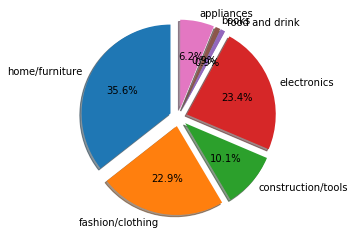

In [22]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'home/furniture', 'fashion/clothing', 'construction/tools', 'electronics','food and drink','books','appliances'
sizes = [home_furniture, fashion_clothing, construction_tools, electronics, food_drink, books, appliances]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title = 'total spend'
plt.show()

In [107]:
mergedf

,order_id,customer_id,order_time,product_id,price,product_category_name,category,date_time,YYYY,MM,month,day,CPI,EMP
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,home_furniture,2017-10-02 10:56:33,2017,10,10/17,10/02/17,0.33,74359.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,fashion_clothing,2018-07-24 20:41:37,2018,7,07/18,07/24/18,0.17,79154.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,auto,2018-08-08 08:38:49,2018,8,08/18,08/08/18,0.07,79151.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,pet_shop,2017-11-18 19:28:06,2017,11,11/17,11/18/17,0.36,NaN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,stationery,2018-02-13 21:18:39,2018,2,02/18,02/13/18,0.17,NaN
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 21:57:05,060cb19345d90064d1015407193c233d,147.90,automotivo,auto,2017-07-09 21:57:05,2017,7,07/17,07/09/17,0.38,NaN
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,2017-04-11 12:22:08,a1804276d9941ac0733cfd409f5206eb,49.90,NaN,NaN,2017-04-11 12:22:08,2017,4,04/17,04/11/17,0.12,64359.0
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:10:30,4520766ec412348b8d4caa5e8a18c464,59.99,automotivo,auto,2017-05-16 13:10:30,2017,5,05/17,05/16/17,0.52,68684.0
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,2017-01-23 18:29:09,ac1789e492dcd698c5c10b97a671243a,19.90,moveis_decoracao,home_furniture,2017-01-23 18:29:09,2017,1,01/17,01/23/17,0.69,65748.0
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,2017-07-29 11:55:02,9a78fb9862b10749a117f7fc3c31f051,149.99,moveis_escritorio,home_furniture,2017-07-29 11:55:02,2017,7,07/17,07/29/17,0.38,NaN


0.3084133967155055


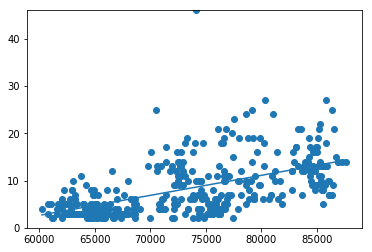

In [106]:
#scatter for EMP and cateogries

groupdf = mergedf.groupby(['EMP', 'category'])
groupdf = groupdf.count()
#sum of prices
#groupdf = groupdf.sum()
groupdf.reset_index(inplace = True)
#why are there sum of prices at 0? no data from those dates?
groupdf = groupdf.loc[groupdf['price'] > 1]
#change categories
groupdf = groupdf.loc[groupdf['category'] == 'auto']

plt.scatter(groupdf['EMP'], groupdf['price'])
plt.ylim(0, max(groupdf['price']))
(slopeEMP, interceptEMP, rEMP, _, _) = linregress(groupdf['EMP'], groupdf['price'])

fitEMP = slopeEMP * groupdf['EMP'] + interceptEMP
plt.plot(groupdf['EMP'], fitEMP)
print(rEMP**2)

0.43755408358801245


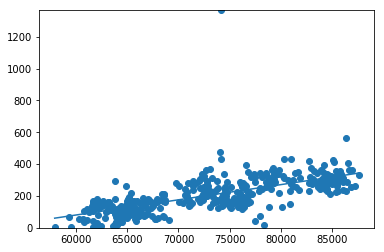

In [109]:
#scatter for EMP

groupdf = mergedf.groupby('EMP')
groupdf = groupdf.count()
#sum of prices
#groupdf = groupdf.sum()
groupdf.reset_index(inplace = True)
#why are there sum of prices at 0? no data from those dates?
groupdf = groupdf.loc[groupdf['price'] > 1]


plt.scatter(groupdf['EMP'], groupdf['price'])
plt.ylim(0, max(groupdf['price']))
(slopeEMP, interceptEMP, rEMP, _, _) = linregress(groupdf['EMP'], groupdf['price'])

fitEMP = slopeEMP * groupdf['EMP'] + interceptEMP
plt.plot(groupdf['EMP'], fitEMP)
print(rEMP**2)

0.0006571722876458738


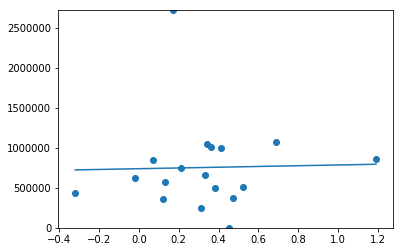

In [111]:
#scatter for EMP

groupdf = mergedf.groupby('CPI')
groupdf = groupdf.sum()
#sum of prices
#groupdf = groupdf.sum()
groupdf.reset_index(inplace = True)
#why are there sum of prices at 0? no data from those dates?
groupdf = groupdf.loc[groupdf['price'] > 1]


plt.scatter(groupdf['CPI'], groupdf['price'])
plt.ylim(0, max(groupdf['price']))
(slopeEMP, interceptEMP, rEMP, _, _) = linregress(groupdf['CPI'], groupdf['price'])

fitEMP = slopeEMP * groupdf['CPI'] + interceptEMP
plt.plot(groupdf['CPI'], fitEMP)
print(rEMP**2)